#Deep Neural Network

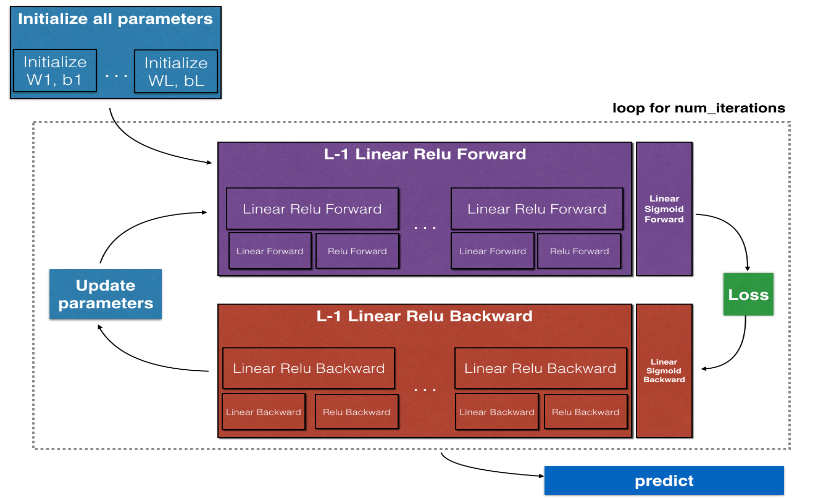

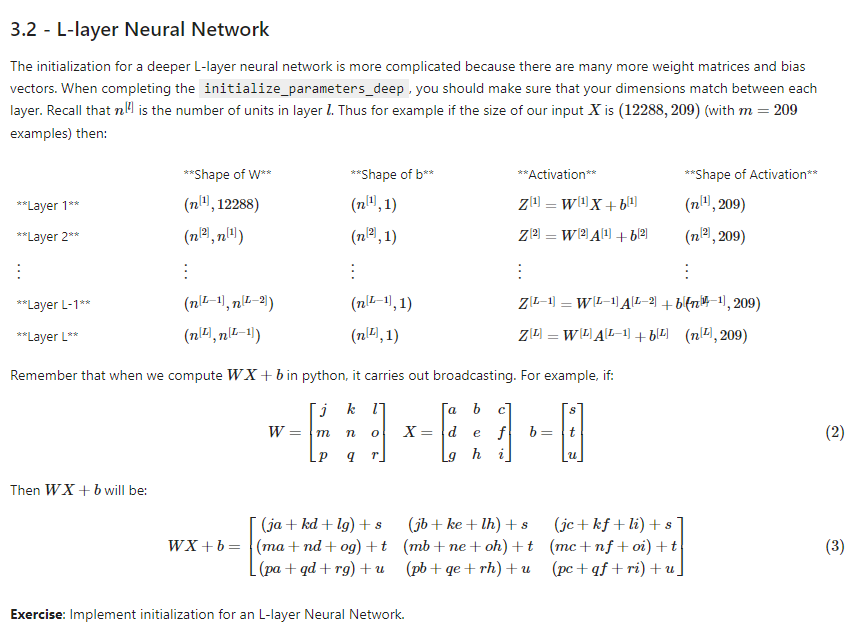

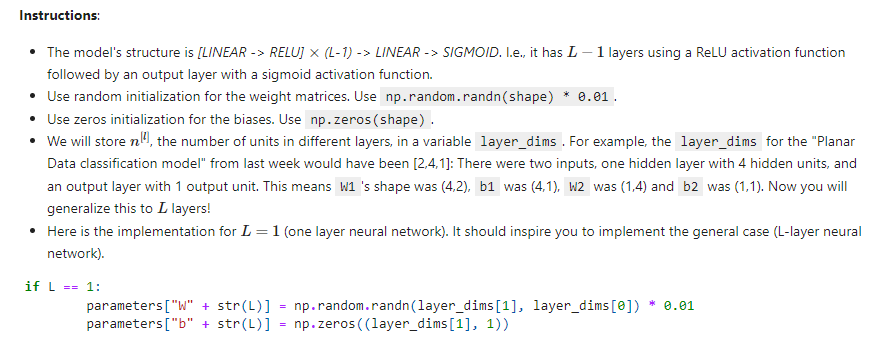

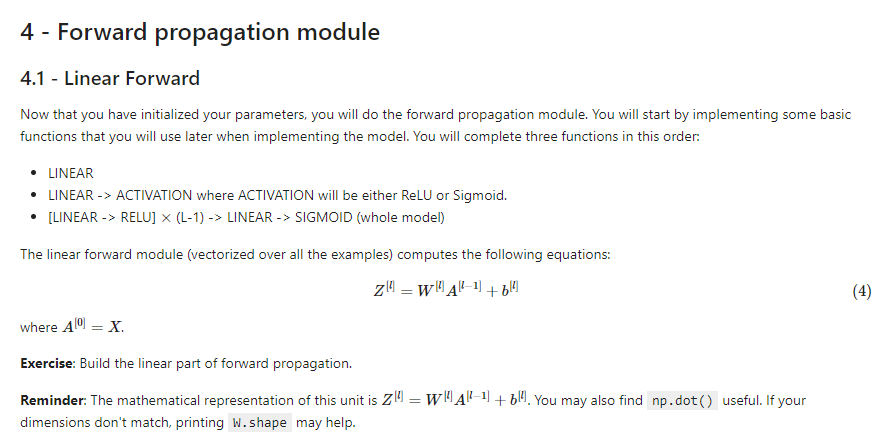

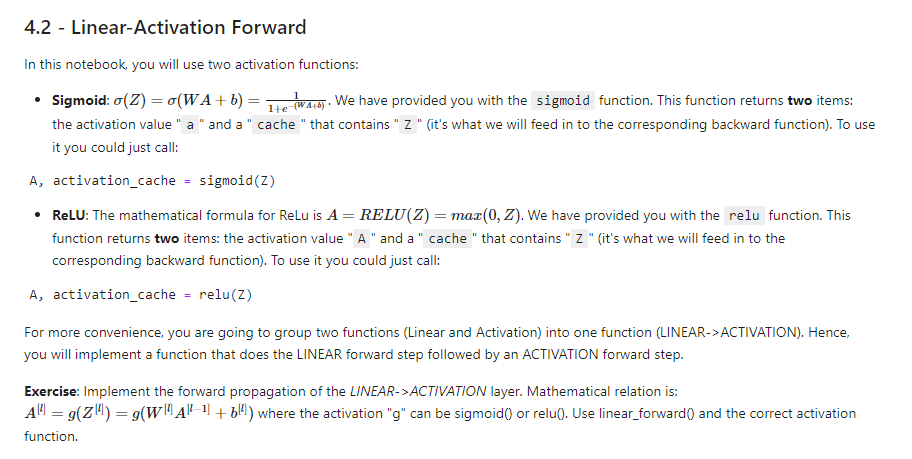

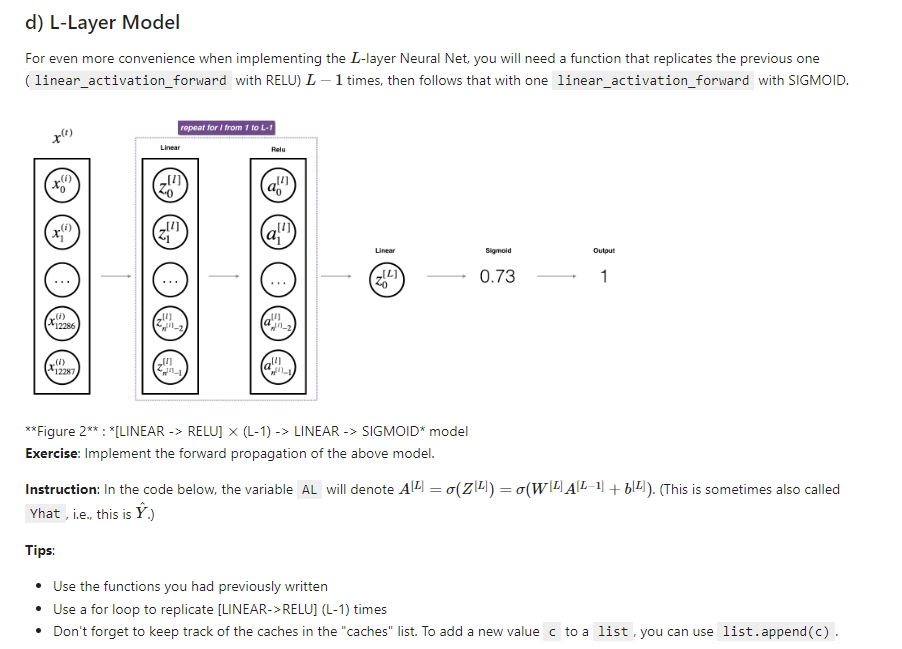

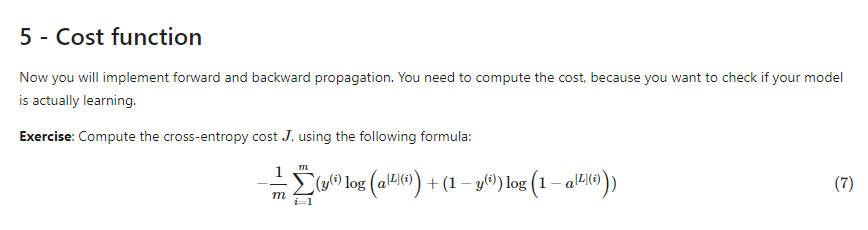

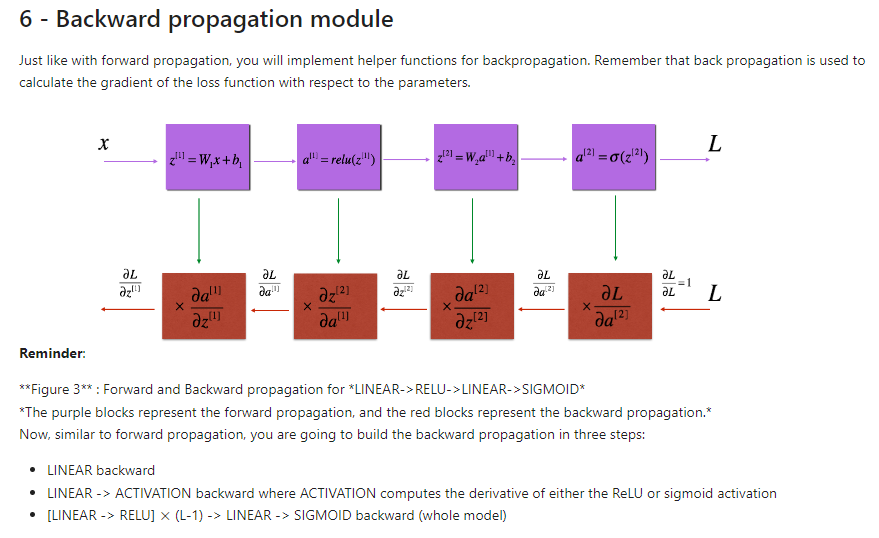

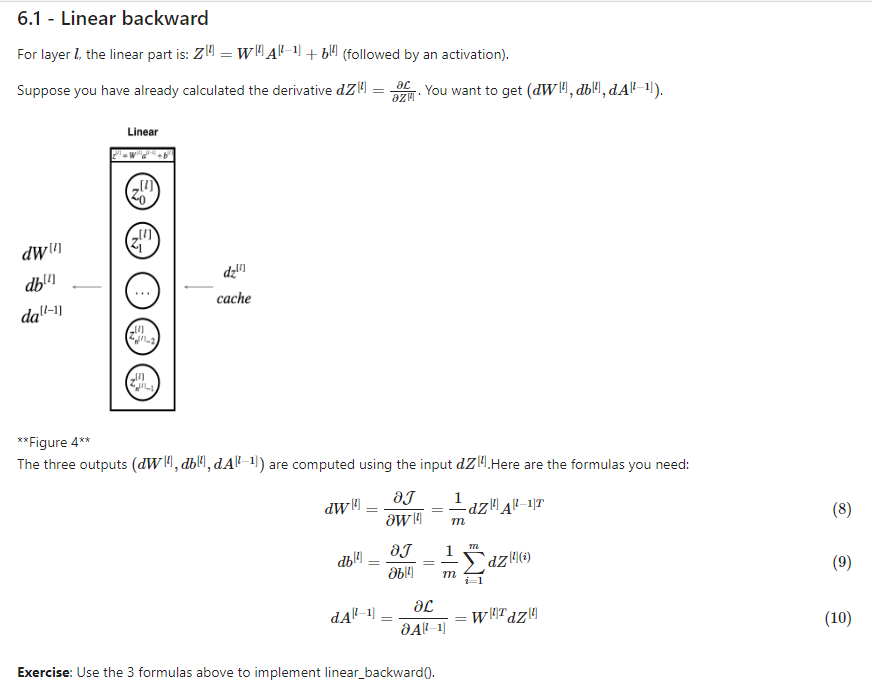

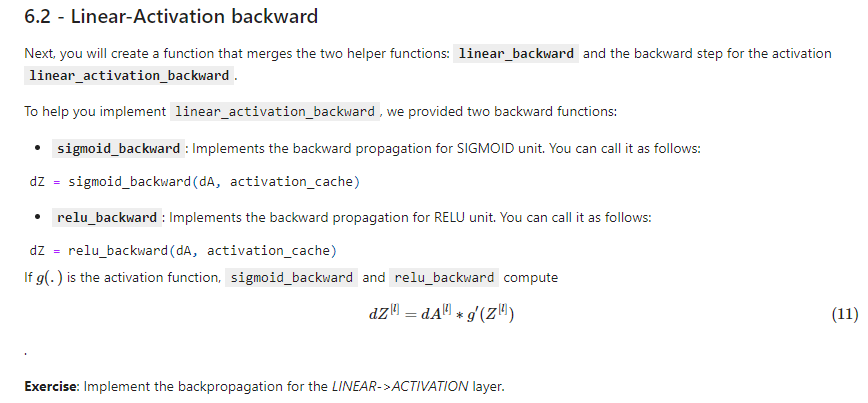

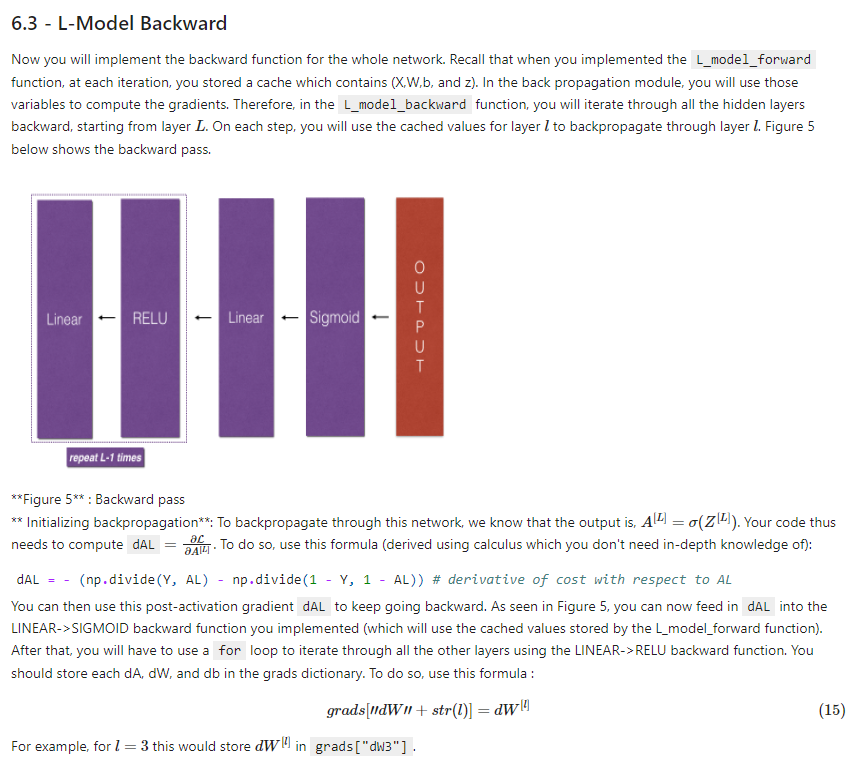

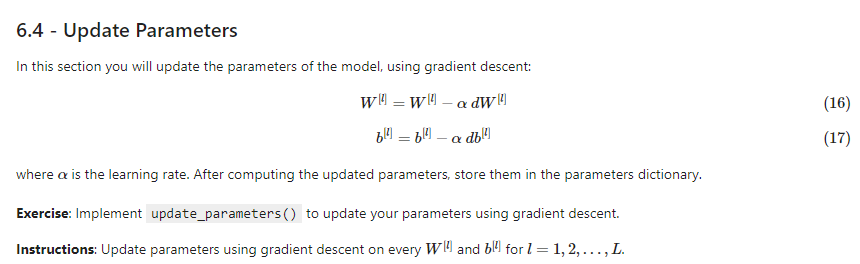

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 0.2726 - accuracy: 0.9221 - val_loss: 0.1340 - val_accuracy: 0.9625
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step -

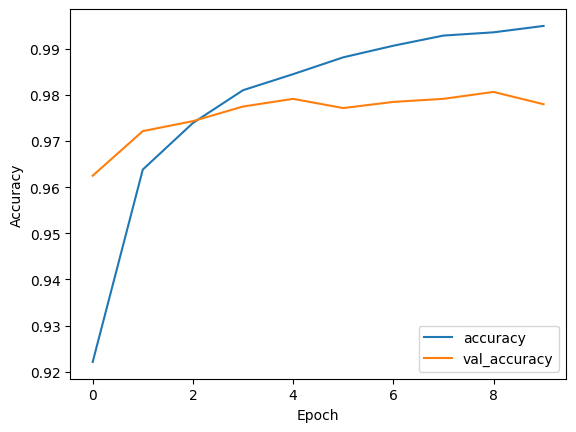

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils, datasets
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the architecture of the neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # Flatten the 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),    # First dense layer with 128 units and ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with 10 units for 10 classes (0-9) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the summary of the model
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
def create_nn_model(layer_dims, activation='relu'):
    model = tf.keras.Sequential()

    for i, units in enumerate(layer_dims[:-1]):
        model.add(tf.keras.layers.Dense(units, activation=activation, name=f'dense_{i}'))

    # Output layer (no activation for classification)
    model.add(tf.keras.layers.Dense(layer_dims[-1], activation=None, name='output'))

    return model

In [ ]:
def compile_model(model, learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
def get_callbacks(patience=3, factor=0.5):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    def lr_scheduler(epoch, lr):
        if epoch > 0 and epoch % patience == 0:
            return lr * factor
        else:
            return lr

    lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

    return [early_stopping, lr_schedule]

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32, callbacks=None):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=callbacks)
    return history

In [ ]:
def train_nn(layer_dims, X_train, y_train, X_val, y_val, activation='relu', learning_rate=0.001,
             epochs=50, batch_size=32, patience=3, lr_factor=0.5):

    model = create_nn_model(layer_dims, activation)
    compile_model(model, learning_rate)
    callbacks = get_callbacks(patience=patience, factor=lr_factor)

    history = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs,
                          batch_size=batch_size, callbacks=callbacks)

    return model, history

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess and reshape data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define layer dimensions for the neural network
layer_dims = [784, 256, 128, 10]  # Input size 784, hidden layers of 256 and 128, output size 10 (for 10 classes)

# Example usage of train_nn function
model, history = train_nn(layer_dims, X_train, y_train, X_val, y_val, activation='relu', learning_rate=0.001,
                          epochs=20, batch_size=32, patience=3, lr_factor=0.5)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2089 - accuracy: 0.9364 - val_loss: 0.1214 - val_accuracy: 0.9625 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.1049 - val_accuracy: 0.9674 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0662 - accuracy: 0.9788 - val_loss: 0.0958 - val_accuracy: 0.9737 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0695 - val_accuracy: 0.9817 - lr: 5.0000e-04

Epoch 5: LearningRateScheduler setting 